In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'lines.markersize': 20,
          'lines.linewidth': 3
         }

pylab.rcParams.update(params)

In [0]:
X_SCALE = 100

def get_y(x):
  return np.cos(x/X_SCALE) + 1

def get_direction(error, px, cx):

  x_dir = (((cx-px) > 0)-0.5) * 2
  error_dir = -((error > 0)-0.5) * 2
  
  gradient_dir = x_dir * error_dir

  return gradient_dir * X_SCALE

def get_error(cy, py):
  return cy-py

In [0]:
N = 100

x = np.linspace(0, np.pi*2, N) * X_SCALE
y = get_y(x)

p = np.random.randint(0, x.shape[0]-1)


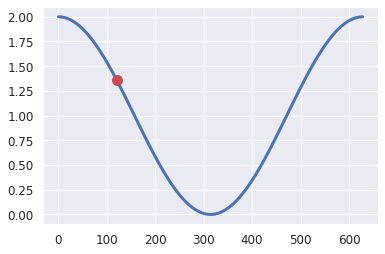

In [4]:
cx = x[p]
cy = y[p]

plt.plot(x,y)
plt.plot(cx, cy, 'r.')


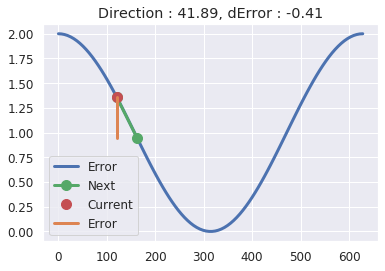

In [5]:
learning_rate = .5

current_direction = (np.random.rand() - 0.5) * 100

nx = cx + current_direction
ny = get_y(nx)

plt.plot(x,y)

plt.plot([cx, nx], [cy, ny], 'g.-')
plt.plot(cx, cy, 'r.')
plt.plot([cx, cx], [cy, ny])

d_error = get_error(ny, cy)
plt.title("Direction : %.2f, dError : %.2f" % (current_direction, d_error))
plt.legend(['Error', 'Next', 'Current', 'Error'])

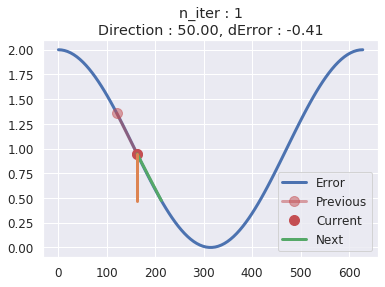

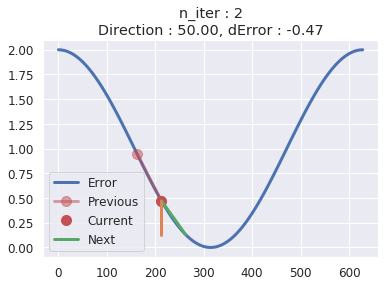

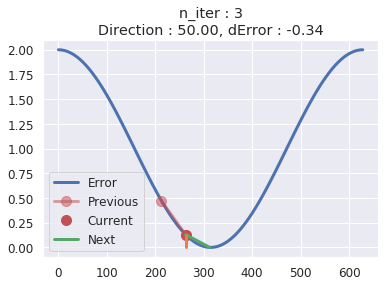

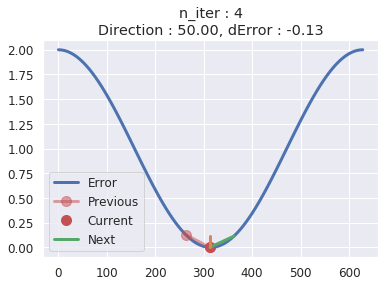

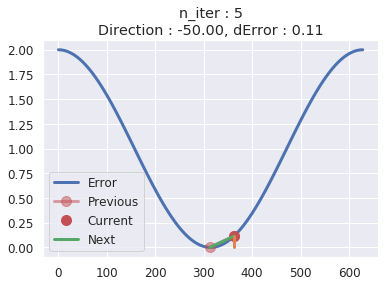

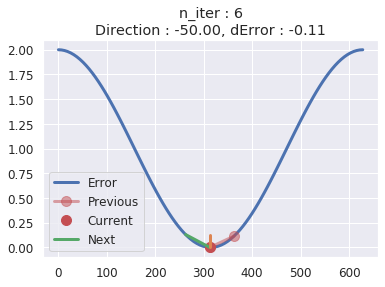

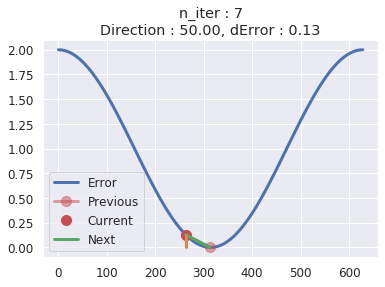

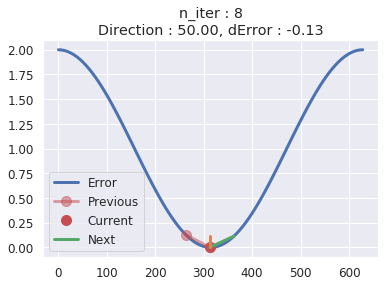

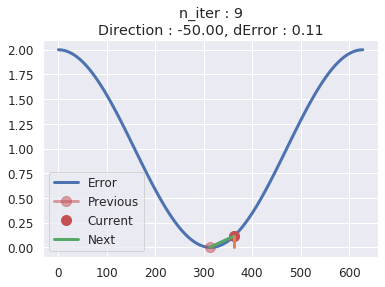

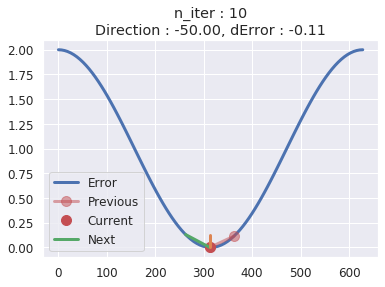

In [6]:
for i in range(10):
  px, py = cx, cy

  cx, cy = nx, ny

  d_error = get_error(cy, py)
  current_direction = get_direction(d_error, px, cx) * learning_rate

  nx = cx + current_direction
  ny = get_y(nx)

  plt.plot(x,y)
  plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)
  plt.plot(cx, cy, 'r.')

  plt.plot([cx, nx], [cy, ny], 'g-')
  plt.plot([cx, cx], [cy, ny])

  plt.title("n_iter : %d\nDirection : %.2f, dError : %.2f" % ((i+1), current_direction, d_error))
  plt.legend(['Error', 'Previous', 'Current', 'Next'])
  plt.show()

